findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


[1.41891411 1.4057673  1.48814026 1.48608722 1.58514585 1.49622383
 1.58905595 1.59278432 1.66640011 1.73867235 1.78080201 1.99478391
 1.91604349]
13

 *** bandgap values ***
1.6   1.42   0.33  -0.16
1.65   1.41   0.36  -0.15
1.7   1.49   0.30  -0.16
1.75   1.49   0.36  -0.19
1.8   1.59   0.28  -0.14
1.85   1.50   0.41  -0.44
1.9   1.59   0.33  -0.26
1.95   1.59   0.52  -0.72
2.0   1.67   0.49  -0.41
2.05   1.74   0.39  -0.33
2.1   1.78   0.42  -0.27
2.15   1.99   0.33  -0.20
2.2   1.92   0.43  -0.25

 *** b exponent values ***
1.6   1.19   0.48  -0.67
1.65   1.22   0.80  -0.76
1.7   1.23   0.43  -0.74
1.75   1.30   0.34  -0.71
1.8   1.26   0.30  -0.74
1.85   1.91   0.92  -1.25
1.9   1.60   0.67  -0.90
1.95   1.77   1.32  -0.97
2.0   1.78   0.80  -1.01
2.05   1.70   0.88  -1.03
2.1   1.93   1.11  -1.35
2.15   1.40   0.71  -0.86
2.2   1.74   1.09  -1.18


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Saved fig = ../plots/Stability_plots_sp14.pdf


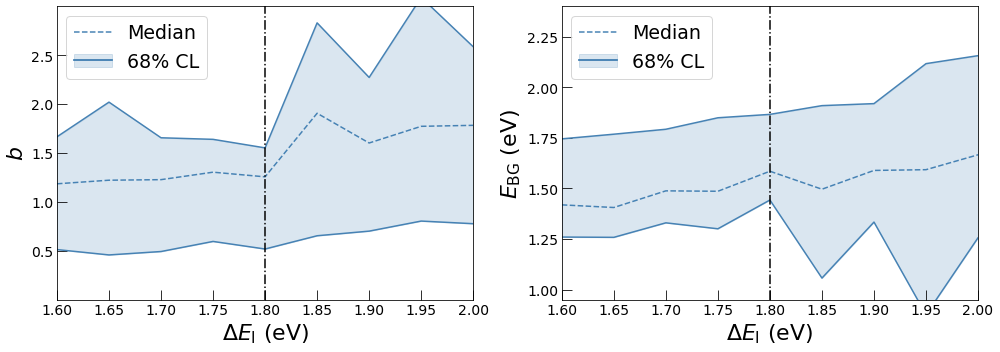

In [10]:
%run Stabilityplots_Sabrya.py